In [2]:
import pandas as pd
df = pd.read_csv(r'/Users/admin/Desktop/python/di-bootcamp/week8/day2/dailychallenge/ex2data1.txt')
df.head()

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [4]:
columns = ['Exam1', 'Exam2', 'Admission']
file_path = '/Users/admin/Desktop/python/di-bootcamp/week8/day2/dailychallenge/ex2data1.txt'
df = pd.read_csv(file_path, header=None, names=columns)
print(df.head())


       Exam1      Exam2  Admission
0  34.623660  78.024693          0
1  30.286711  43.894998          0
2  35.847409  72.902198          0
3  60.182599  86.308552          1
4  79.032736  75.344376          1


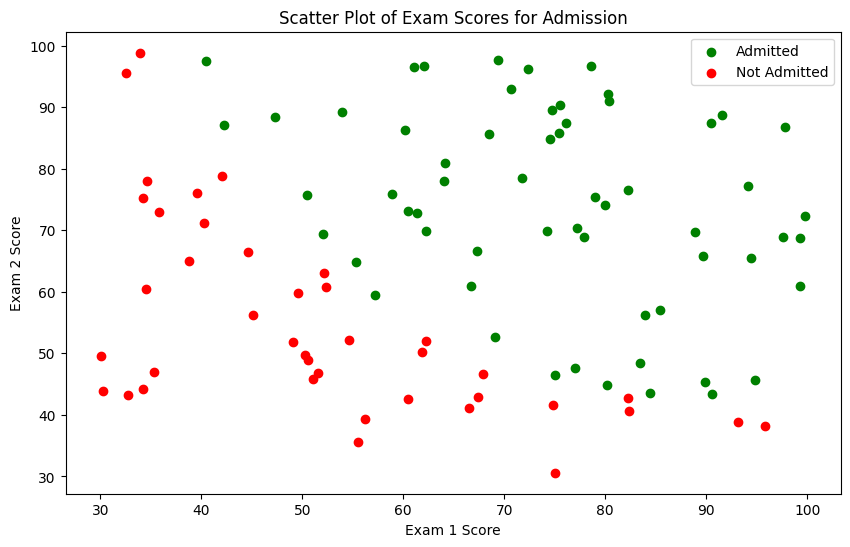

In [5]:
import matplotlib.pyplot as plt

admitted = df[df['Admission'] == 1]
not_admitted = df[df['Admission'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(admitted['Exam1'], admitted['Exam2'], color='green', label='Admitted')
plt.scatter(not_admitted['Exam1'], not_admitted['Exam2'], color='red', label='Not Admitted')

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Scatter Plot of Exam Scores for Admission')
plt.legend()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features (X) and target variable (y)
X = df[['Exam1', 'Exam2']]
y = df['Admission']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8
Confusion Matrix:
[[7 1]
 [3 9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


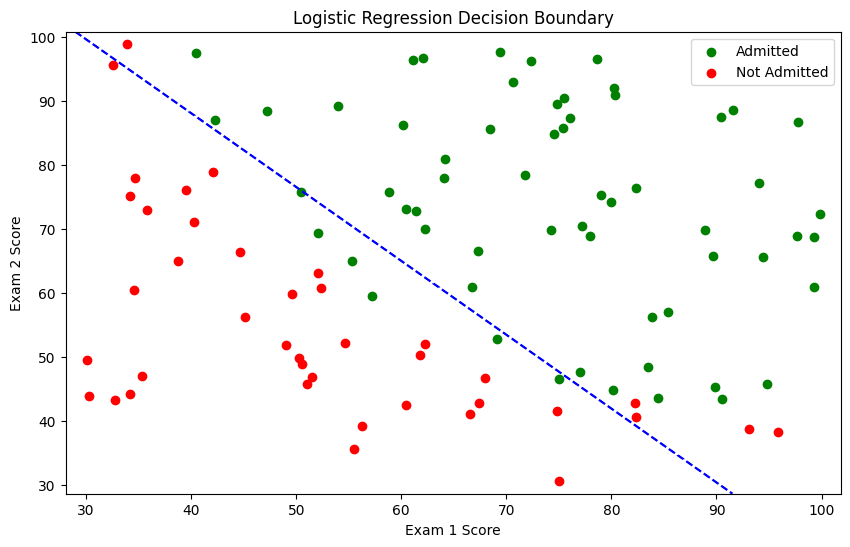

In [8]:
import numpy as np
# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(admitted['Exam1'], admitted['Exam2'], color='green', label='Admitted')
plt.scatter(not_admitted['Exam1'], not_admitted['Exam2'], color='red', label='Not Admitted')

# Plot decision boundary
x_min, x_max = X['Exam1'].min() - 2, X['Exam1'].max() + 2
y_min, y_max = X['Exam2'].min() - 2, X['Exam2'].max() + 2

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='blue', levels=[0.5], linestyles='dashed')

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

Accuracy: The accuracy is 0.8, or 80%. This means that 80% of the predictions made by your model on the test set were correct.

Confusion Matrix:
TN 7 - meaning instances that were correctly predicted as "not admitted."
FP 1 - meaning instances that were incorrectly predicted as "admitted" when they were actually "not admitted."
FN 3 - meaning instances that were incorrectly predicted as "not admitted" when they were actually "admitted."
TP 9 - meaning instances that were correctly predicted as "admitted."

Classification Report:
- Precision is the ratio of correctly predicted positive observations (TP) to the total predicted positives (TP + FP). In this case, precision for class 0 is 0.70, and for class 1 is 0.90.
- Recall is the ratio of correctly predicted positive observations to the all observations in the actual class (TP + FN). In this case, recall for class 0 is 0.88, and for class 1 is 0.75.
- The F1-score is the weighted average of precision and recall. It considers both false positives and false negatives. F1-score is used when there is an uneven class distribution. For class 0, the F1-score is 0.78, and for class 1, it is 0.82.
- Support. The number of actual occurrences of the class in the specified dataset. For class 0, there are 8 instances, and for class 1, there are 12 instances.

Overall, this model seems to have good accuracy, but it's always important to consider the context of the problem and the specific requirements.
